# Data Cleaning and Exploration

The purpose of this section is to clean the data sets and the explore the data that is in them. As it stands there are 12 seperate data sets and that can be very messy for analysing the data. It is easier to join all the data sets together. This will make the data analysis section a lot easier and will also make the data processing section for clustering easier also.

The first step of the data exploration phase is to import any necessary packages

In [1]:
import pandas as pd
import numpy as np

For the purpose of this assignment their are several different data sets to be read in and explored.<br />
There are 12 data sets to read in.
They are as follows:
* **Wins:** These data sets show how much money participants win during each part of the trial
* **Losses:** These data sets show how much, "Amount_lost", "Amount_won"h money participants lose during each part of the trial
* **Choice:** These data sets indicate what deck participants chose during each part of the trial
* **Index:** These data sets contain the name of the first author of the study that reports the data of the corresponding participant.

### Importing data sets

In [2]:
win_95 = pd.read_csv('data/wi_95.csv')
win_100 = pd.read_csv('data/wi_100.csv')
win_150 = pd.read_csv('data/wi_150.csv')

In [3]:
loss_95 = pd.read_csv('data/lo_95.csv')
loss_100 = pd.read_csv('data/lo_100.csv')
loss_150 = pd.read_csv('data/lo_150.csv')

In [4]:
choice_95 = pd.read_csv('data/choice_95.csv')
choice_100 = pd.read_csv('data/choice_100.csv')
choice_150 = pd.read_csv('data/choice_150.csv')

In [5]:
index_95 = pd.read_csv('data/index_95.csv')
index_100 = pd.read_csv('data/index_100.csv')
index_150 = pd.read_csv('data/index_150.csv')

The next process is to clean the above data

Data cleaning is a very important part of the data exploration process as it will identify and remove errors for machine learning processes in the future

### Data Cleaning

My first data cleaning step is to check for null values in the data sets

In [6]:
win_95.isna().sum().sum() + win_100.isna().sum().sum() + win_150.isna().sum().sum()

0

There are no null values in the wins data sets


In [7]:
loss_95.isna().sum().sum() + loss_100.isna().sum().sum() + loss_150.isna().sum().sum()

0

There are no null values in the losses data sets

In [8]:
choice_95.isna().sum().sum() + choice_100.isna().sum().sum() + choice_150.isna().sum().sum()

0

There are no null values in the choices data sets


In [9]:
index_95.isna().sum().sum() + index_100.isna().sum().sum() + index_150.isna().sum().sum()

0

There are no null values in the choices data sets

Due to the large number of data sets, it might make it simpler to join tables based on the number of trials

:::{note}
Below I am making a new column for each number of trials. The new column shows to total won or lost per person.
:::

In [10]:
total_win_95 = win_95.sum(axis=1)
total_loss_95 = loss_95.sum(axis=1)
total_95 = total_win_95 + total_loss_95

total_win_100 = win_100.sum(axis=1)
total_loss_100 = loss_100.sum(axis=1)
total_100 = total_win_100 + total_loss_100

total_win_150 = win_150.sum(axis=1)
total_loss_150 = loss_150.sum(axis=1)
total_150 = total_win_150 + total_loss_150

Making totals into pandas dataframes for further analysis

In [11]:
total_95 = pd.DataFrame(total_95)
total_95 = total_95.rename(columns={0: 'Total'})

total_100 = pd.DataFrame(total_100)
total_100 = total_100.rename(columns={0: 'Total'})

total_150 = pd.DataFrame(total_150)
total_150 = total_150.rename(columns={0: 'Total'})

Adding Study Names to the totals column

In [12]:
total_95["Study_Type"] = index_95["Study"].values
total_100["Study_Type"] = index_100["Study"].values
total_150["Study_Type"] = index_150["Study"].values

Adding column for number of participants in the trial

In [13]:
total_95["No_participants"] = 95
total_100["No_participants"] = 100
total_150["No_participants"] = 150

Adding total won and total lost per player over the course of the task

In [14]:
total_95["Amount_won"] = win_95.sum(axis=1)
total_95["Amount_lost"] = loss_95.sum(axis=1)

total_100["Amount_won"] = win_100.sum(axis=1)
total_100["Amount_lost"] = loss_100.sum(axis=1)

total_150["Amount_won"] = win_150.sum(axis=1)
total_150["Amount_lost"] = loss_150.sum(axis=1)

Adding choice of cards into each data frame

[Pandas series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html), returns a Series containing counts of unique values.

In [15]:
total_choice_95 = choice_95.apply(pd.Series.value_counts, axis=1)

total_choice_100 = choice_100.apply(pd.Series.value_counts, axis=1)

total_choice_150 = choice_150.apply(pd.Series.value_counts, axis=1)

total_choices = total_choice_95.append(total_choice_100)
total_choices = total_choices.append(total_choice_150)

In [16]:
total_choices.shape

(617, 4)

Showing the number of columns in the new datasets shows that no rows have been lost

In [17]:
total_95.shape[0] +total_150.shape[0] + total_100.shape[0]

617

Showing the number of columns in the new datasets shows that no rows have been lost

In [18]:
total_95.shape[0] +total_150.shape[0] + total_100.shape[0]

617

Joining all the totals datasets together

In [19]:
totals = total_95.append(total_100)
totals = totals.append(total_150)

In [20]:
totals.shape

(617, 5)

The last step of the data cleaning process is to join thte totals dataframe to the total_choices data frame

In [21]:
all_data = pd.concat([totals, total_choices], axis=1)
all_data = all_data.fillna(0)

In [22]:
all_data.shape

(617, 9)

### Data Analysis/Exploration

Analysing the wins and losses for each number of trials

Seaborn and Matplotlib will be used to visualise the data

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
all_data.head()

,Total,Study_Type,No_participants,Amount_won,Amount_lost,1,2,3,4
Subj_1,1150,Fridberg,95,5800,-4650,12.0,9.0,3.0,71.0
Subj_2,-675,Fridberg,95,7250,-7925,24.0,26.0,12.0,33.0
Subj_3,-750,Fridberg,95,7100,-7850,12.0,35.0,10.0,38.0
Subj_4,-525,Fridberg,95,7000,-7525,11.0,34.0,12.0,38.0
Subj_5,100,Fridberg,95,6450,-6350,10.0,24.0,15.0,46.0


Descriptive statistics for the Total column.

In [25]:
all_data["Total"].describe()

count     617.000000
mean     -156.831442
std      1251.585443
min     -4250.000000
25%     -1000.000000
50%      -170.000000
75%       650.000000
max      3750.000000
Name: Total, dtype: float64

In [26]:
all_data[all_data["Total"] < 0].shape

(333, 9)

333 of the participants of these experiments lost money that is approximately 54% of all the participants.

This is initally surprising considering all the participants are deemed to be "healthy"

Healthy patients should be able to find the most advantageous decks (3 and 4) and stick to them

Now I will check a comparison of wins vs losses for each type of study (95 participants, 100 participants and 150 participants)

### Analysis for studies containing 95 participants

In [27]:
all_data_95 = all_data[all_data["No_participants"] == 95]

In [28]:
all_data_95[[1,2,3,4]].sum()

1    187.0
2    425.0
3    194.0
4    619.0
dtype: float64

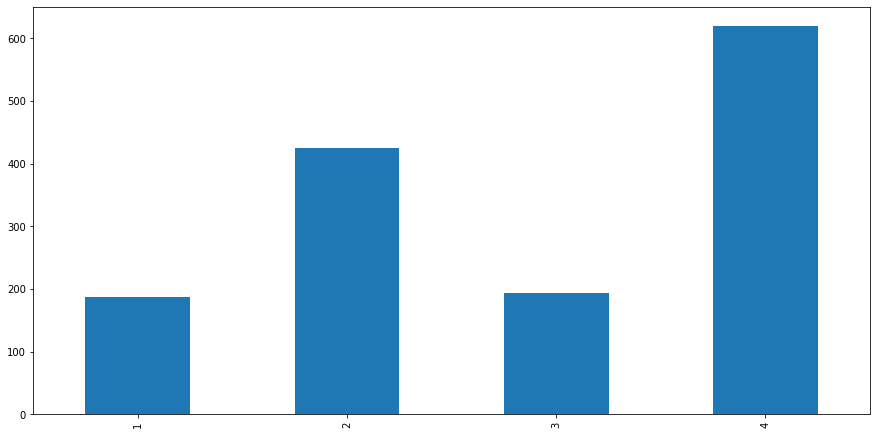

In [29]:
all_data_95[[1,2,3,4]].sum().plot.bar(figsize=(15,7.5))

In [30]:
all_data_95.head(1)

,Total,Study_Type,No_participants,Amount_won,Amount_lost,1,2,3,4
Subj_1,1150,Fridberg,95,5800,-4650,12.0,9.0,3.0,71.0


In [31]:
all_data_95["Study_Type"].value_counts()

Fridberg    15
Name: Study_Type, dtype: int64

:::{note}
Fridberg is the only study that had experiments with participants only having 95 trials.
:::

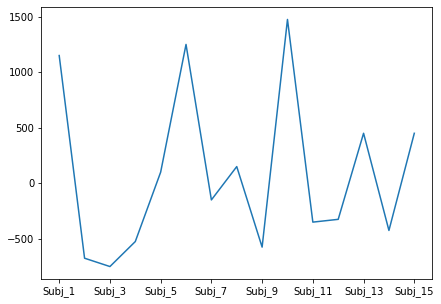

In [32]:
all_data_95["Total"].plot(figsize=(7,5))

As there are only 15 participants it is hard to find anything concrete about the amounts won and lost in these trials from the visualisation

In [33]:
all_data_95["Total"].describe()

count      15.000000
mean       83.333333
std       729.460825
min      -750.000000
25%      -475.000000
50%      -150.000000
75%       450.000000
max      1475.000000
Name: Total, dtype: float64

In [34]:
all_data_95[all_data_95["Total"] <0].shape

(8, 9)

8 of the participants in this trial failed to make any money

With participants in this study with 95 trials it is difficult to come to any conclusions due to the fact that there are simply not enough participants.

### Analysis for studies containing 100 participants

In [35]:
all_data_100 = all_data[all_data["No_participants"] == 100]

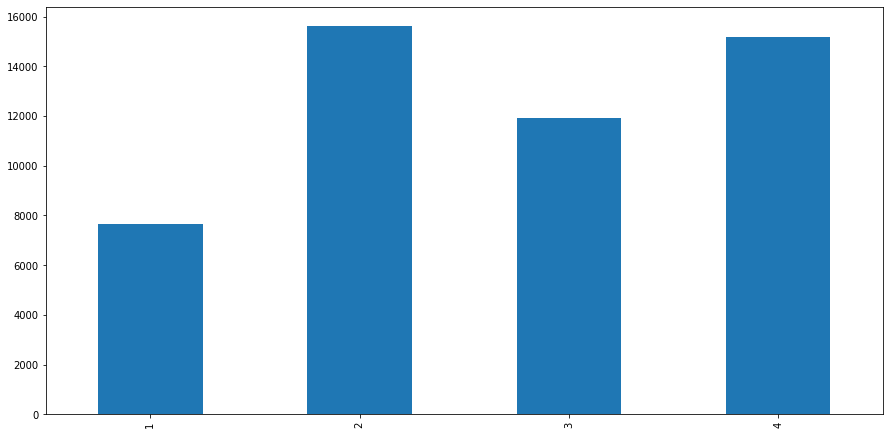

In [36]:
all_data_100[[1,2,3,4]].sum().plot.bar(figsize=(15,7.5))

compare total won and lost for each study

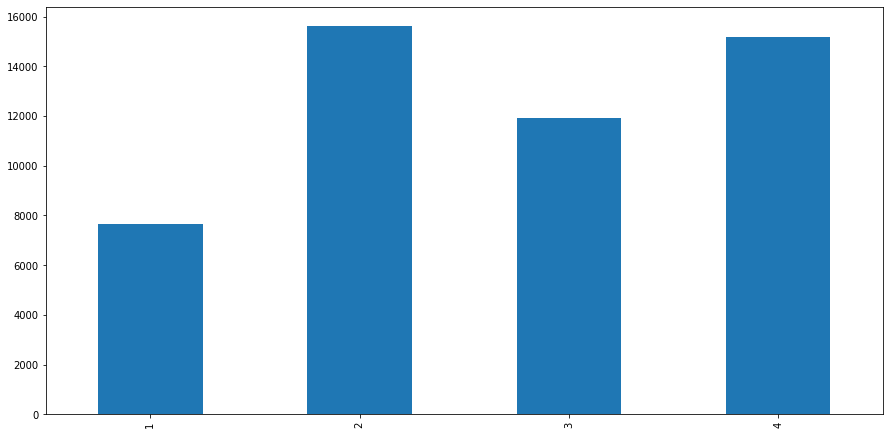

In [37]:
all_data_100[[1,2,3,4]].sum().plot.bar(figsize=(15,7.5))

In [38]:
all_data_100.head(1)

,Total,Study_Type,No_participants,Amount_won,Amount_lost,1,2,3,4
Subj_1,-1800,Horstmann,100,8150,-9950,21.0,42.0,15.0,22.0


In [39]:
all_data_100["Total"].describe()

count     504.000000
mean     -266.994048
std      1178.585955
min     -4250.000000
25%     -1050.000000
50%      -300.000000
75%       550.000000
max      3570.000000
Name: Total, dtype: float64

In [40]:
all_data_100["Study_Type"].value_counts()

Horstmann            162
Wood                 153
SteingroverInPrep     70
Maia                  40
Worthy                35
Premkumar             25
Kjome                 19
Name: Study_Type, dtype: int64

In [41]:
all_data_100.groupby("Study_Type")["Total"].sum()

Study_Type
Horstmann             -6200
Kjome                 -8750
Maia                  13600
Premkumar              5995
SteingroverInPrep     -4700
Wood                -119410
Worthy               -15100
Name: Total, dtype: int64

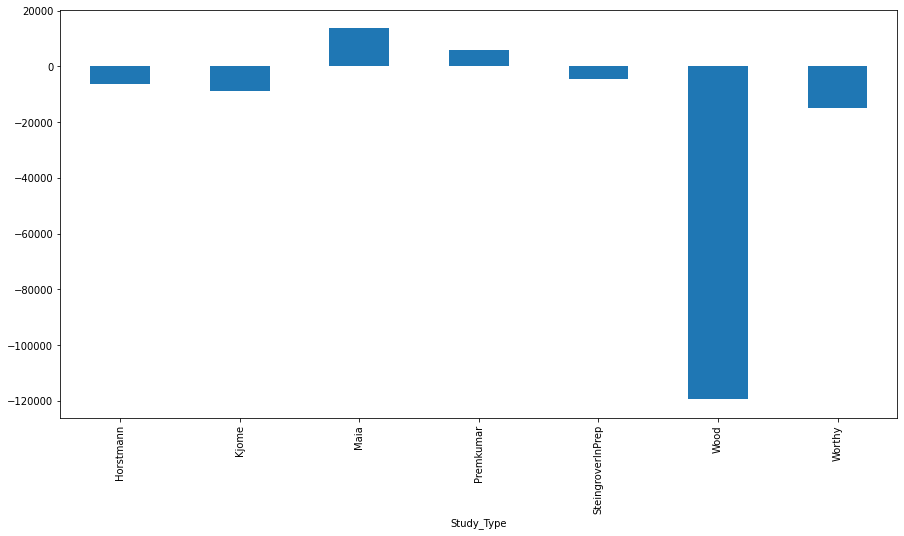

In [42]:
all_data_100.groupby("Study_Type")["Total"].sum().plot.bar(figsize=(15,7.5))

Look into Maia study and see why it was the only one to make any money

Maia was in the payoff 1 scheme

In [43]:
all_data_100[all_data_100["Study_Type"] == "Wood"]

,Total,Study_Type,No_participants,Amount_won,Amount_lost,1,2,3,4
Subj_317,-320,Wood,100,8080,-8400,19.0,30.0,25.0,26.0
Subj_318,-1030,Wood,100,8870,-9900,17.0,43.0,20.0,20.0
Subj_319,-1850,Wood,100,8450,-10300,20.0,35.0,21.0,24.0
Subj_320,-775,Wood,100,8150,-8925,22.0,28.0,24.0,26.0
Subj_321,-1600,Wood,100,8250,-9850,16.0,35.0,19.0,30.0
...,...,...,...,...,...,...,...,...,...
Subj_465,2400,Wood,100,6600,-4200,5.0,10.0,25.0,60.0
Subj_466,-1035,Wood,100,8190,-9225,25.0,27.0,23.0,25.0
Subj_467,-2375,Wood,100,8975,-11350,12.0,47.0,19.0,22.0
Subj_468,1390,Wood,100,6940,-5550,5.0,16.0,19.0,60.0


### Analysis for studies containing 150 participants

In [44]:
all_data_150 = all_data[all_data["No_participants"] == 150]

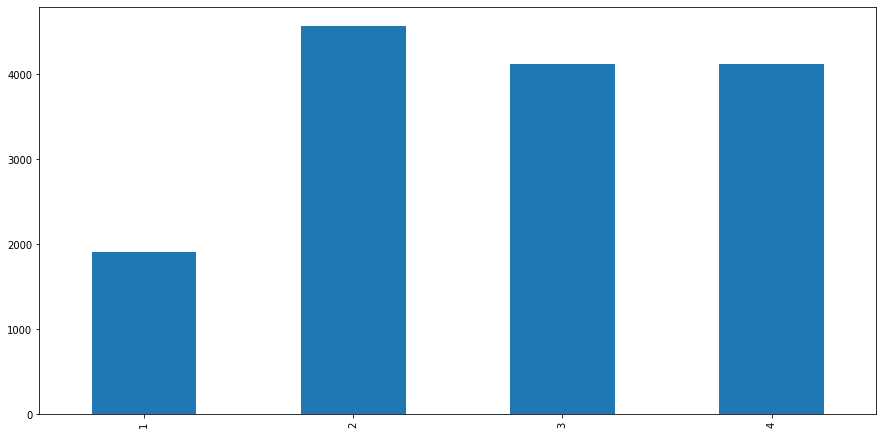

In [45]:
all_data_150[[1,2,3,4]].sum().plot.bar(figsize=(15,7.5))

Both of these studies were in the payoff 2 scheme

Compare total won and lost for each study

In [46]:
all_data_150["Study_Type"].value_counts()

Steingroever2011    57
Wetzels             41
Name: Study_Type, dtype: int64

In [47]:
all_data_150.groupby("Study_Type")["Total"].sum()

Study_Type
Steingroever2011    12550
Wetzels             24000
Name: Total, dtype: int64

In [48]:
all_data_150["Total"].describe()

count      98.000000
mean      372.959184
std      1520.668063
min     -4200.000000
25%      -500.000000
50%       350.000000
75%      1450.000000
max      3750.000000
Name: Total, dtype: float64

In [49]:
all_data_150.shape

(98, 9)

In [50]:
len(all_data_150[all_data_150["Total"] > 0])

62

In the case of 150 participants 62 out of 98 partipants made money.

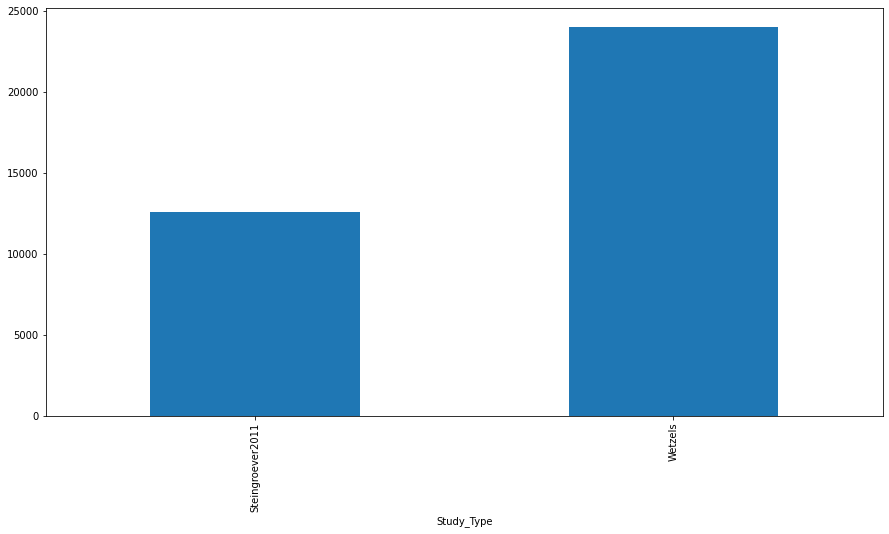

In [51]:
all_data_150.groupby("Study_Type")["Total"].sum().plot.bar(figsize=(15,7.5))

### Comparing outputs for all 3 trials

Card deck selection analysis

In [52]:
all_data[[1,2,3,4]].sum()

1     9757.0
2    20601.0
3    16240.0
4    19927.0
dtype: float64

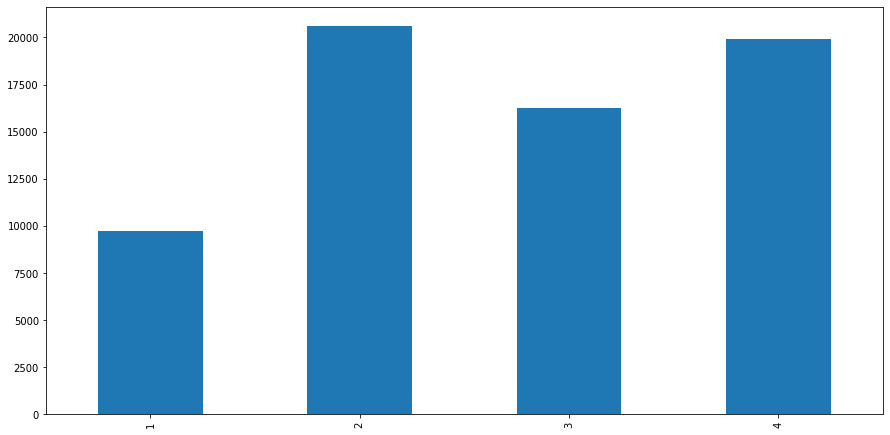

In [53]:
all_data[[1,2,3,4]].sum().plot.bar(figsize=(15,7.5))

:::{note}
The distribution of the card selections below is for my understanding.
I will need to standardise the card selection figures in the data preparation phase
:::

/home/michael/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


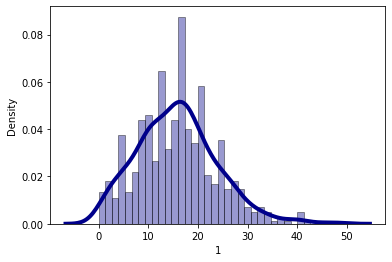

In [54]:
sns.distplot(all_data[1], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/home/michael/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


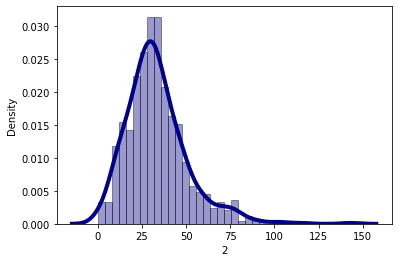

In [55]:
sns.distplot(all_data[2], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/home/michael/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


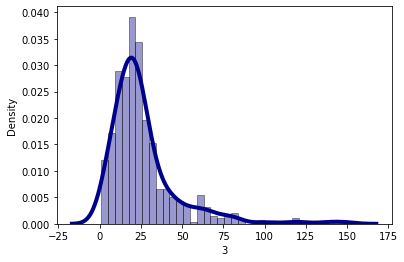

In [56]:
sns.distplot(all_data[3], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/home/michael/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


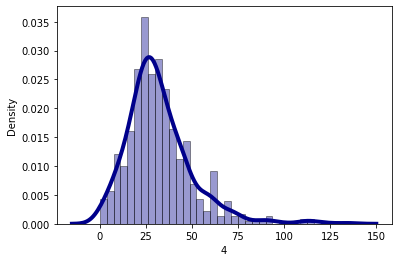

In [57]:
sns.distplot(all_data[4], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Distribution of totals

/home/michael/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


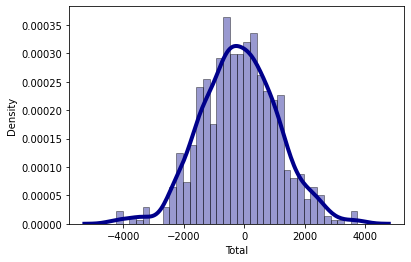

In [58]:
sns.distplot(all_data['Total'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [59]:
all_data["Total"].describe()

count     617.000000
mean     -156.831442
std      1251.585443
min     -4250.000000
25%     -1000.000000
50%      -170.000000
75%       650.000000
max      3750.000000
Name: Total, dtype: float64

From looking at these figures it might be interesting to view these figures in the clustering section along with the study they were apart of

/home/michael/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


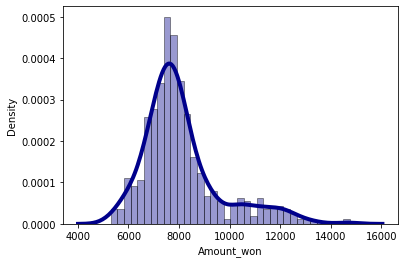

In [60]:
sns.distplot(all_data['Amount_won'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/home/michael/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


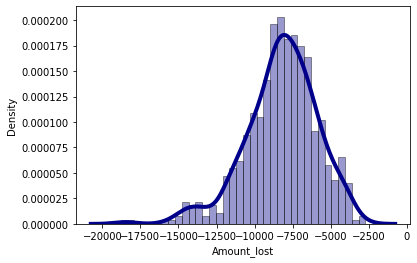

In [61]:
sns.distplot(all_data['Amount_lost'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

From the distribution plot the data for the total won/lost seems to follow a normal distribution

In [62]:
all_data["Total"].describe()

count     617.000000
mean     -156.831442
std      1251.585443
min     -4250.000000
25%     -1000.000000
50%      -170.000000
75%       650.000000
max      3750.000000
Name: Total, dtype: float64

In [63]:
all_data.isna().sum().sum()

0

### Data Analysis comments

From my initial data we saw that of all the decks picked, deck no 2 was picked the most. It might be interesting to do some clustering on deck no2 for Amount_won, Amount_lost and totals compared to the other decks. Along with deck 2, I would also like to perform cluster analysis on the other decks to see if there are any similarities. 

The final step is to export the cleaned data set for data preparation

In [65]:
all_data.to_csv('data/all_data.csv')